**<font size=48>Python Tutorial</font>**<br>
<br>

Most parts of this notebook have been adapted from [CS231n Python v3.0 tutorial](http://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson.

# Introduction
Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

This notebook will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

In this tutorial, we will cover:
* [Jupyter and Colab Notebooks](#notebooks)
* [Python](#python)
    * [Basic data types](#python-basic)
    * [Containers](#python-containers)
        * [Lists](#python-lists)
        * [Dictionaries](#python-dicts)
        * [Sets](#python-sets)
        * [Tuples](#python-tuples)
    * [Functions](#python-functions)
    * [Classes](#python-classes)
* [Matplotlib](#mpl)
    * [Plotting](#mpl-plot)
    * [Bar Plot](#mpl-bar)
    * [Categorical Data](#mpl-cat)
    * [Scatter](#mpl-scatter)
    * [Annotate](#mpl-annotate)
    * [Histogram](#mpl-hist)
    * [Subplot](#mpl-subplot)
    * [Images](#mpl-images)
* [Pypi](#pypi)
    * [Pip](#pypi-pip)
    * [Virtual Environments](#pypi-env)
    * [Pipenv](#pypi-pipenv)

# <a id="notebooks">Jupyter and Colab Notebooks</a>
Before we dive into Python, we’d like to briefly talk about notebooks. A Jupyter notebook lets you write and execute Python code locally in your web browser. Jupyter notebooks make it very easy to tinker with code and execute it in bits and pieces; for this reason they are widely used in scientific computing. Colab on the other hand is Google’s flavor of Jupyter notebooks that is particularly suited for machine learning and data analysis and that runs entirely in the cloud. Colab is basically Jupyter notebook on steroids: it’s free, requires no setup, comes preinstalled with many packages, is easy to share with the world, and benefits from free access to hardware accelerators like GPUs and TPUs (with some caveats).

# <a id="python">Python</a>
Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [67]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Python versions
There are currently two different supported versions of Python, 2 and 3. Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes to the language, so code written for 2 may not work under 3 and vice versa. For this class all code will use latest version of Python.

You can check your Python version at the command line by running `python --version`.

## <a id="python-basic">Basic data types</a>
Like most languages, Python has a number of basic types including integers, floats, booleans, and strings. These data types behave in ways that are familiar from other programming languages.

**Numbers**: Integers and floats work as you would expect from other languages:

In [68]:
x = 3
print(type(x)) # Prints "<class 'int'>"

<class 'int'>


In [69]:
print(x)
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

3
4
2
6
9


In [70]:
print(x)
x += 1
print(x)

3
4


In [71]:
x *= 2
print(x)

8


In [72]:
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (`x++`) or decrement (`x--`) operators.

Python also has built-in types for complex numbers; you can find all of the details [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

**Booleans**: Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [73]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"


<class 'bool'>


In [74]:
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

False
True
False
True


**Strings**: Python has great support for strings:

In [75]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"

hello
5


In [76]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


In [77]:
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello world 12


String objects have a bunch of useful methods; for example:

In [13]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "

Hello
HELLO
  hello
 hello 


In [14]:
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"

he(ell)(ell)o


In [15]:
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

world


You can find a list of all string methods [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

## <a id="python-containers">Containers</a>
Python includes several built-in container types: lists, dictionaries, sets, and tuples.

### <a id="python-lists">Lists</a>
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [16]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [17]:
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"

[3, 1, 'foo']


In [18]:
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"

[3, 1, 'foo', 'bar']


In [19]:
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

bar [3, 1, 'foo']


In [20]:
xs.pop(1) # remove element from a specific position
print(xs)

[3, 'foo']


As usual, you can find all the gory details about lists [in the documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

**Slicing**: In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [21]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]


In [22]:
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 8, 9, 4]


We will see slicing again in the context of numpy arrays.

**Loops**: You can loop over the elements of a list like this:

In [23]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [24]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


**List comprehensions**: When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [25]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a **list comprehension**:

In [26]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [27]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


### <a id="python-dicts">Dictionaries</a>
A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [28]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [29]:
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
#print(d['monkey'])  # KeyError: 'monkey'

wet


In [30]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A
wet
N/A


You can find all you need to know about dictionaries [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

**Loops**: It is easy to iterate over the keys in a dictionary:

In [78]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


**Dictionary comprehensions**: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [32]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


In [33]:
another_dict = {x:x**3 for x in even_num_to_square}
print(another_dict)

{0: 0, 2: 8, 4: 64}


### <a id="python-sets">Sets</a>
A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [34]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"

True
False


In [35]:
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"

True
3


In [36]:
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"

3


In [37]:
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

2


As usual, everything you want to know about sets can be found [in the documentation](https://docs.python.org/3.7/library/stdtypes.html#set).

**Loops**: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [38]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: dog
#2: fish
#3: cat


**Set comprehensions**: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [39]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


### <a id="python-tuples">Tuples</a>
A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [40]:
t=(1,2)
print(t)
print(type(t))
print(t[0])

(1, 2)
<class 'tuple'>
1


In [41]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


[The documentation](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

## <a id="python-functions">Functions</a>
Python functions are defined using the def keyword. For example:

In [42]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [43]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


There is a lot more information about Python functions [in the documentation](https://docs.python.org/3.7/tutorial/controlflow.html#defining-functions).

## <a id="python-classes">Classes</a>
The syntax for defining classes in Python is straightforward:

In [44]:
class Greeter(object):

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


You can read a lot more about Python classes [in the documentation](https://docs.python.org/3.7/tutorial/classes.html).

# <a id="mpl">Matplotlib</a>
[Matplotlib](http://matplotlib.org/) is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

## <a id="mpl-plot">Plotting</a>
The most important function in matplotlib is `plot`, which allows you to plot 2D data. Here is a simple example:

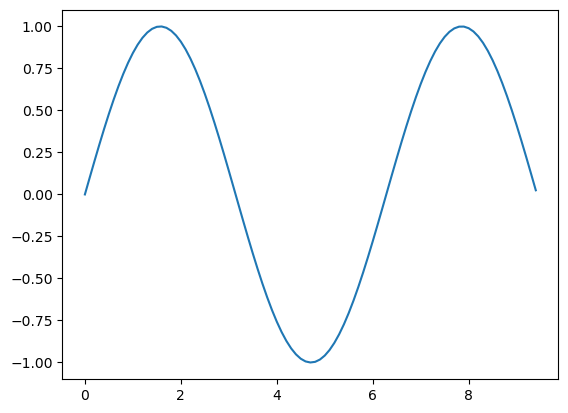

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.savefig('test.png')
plt.show()  # You must call plt.show() to make graphics appear.

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

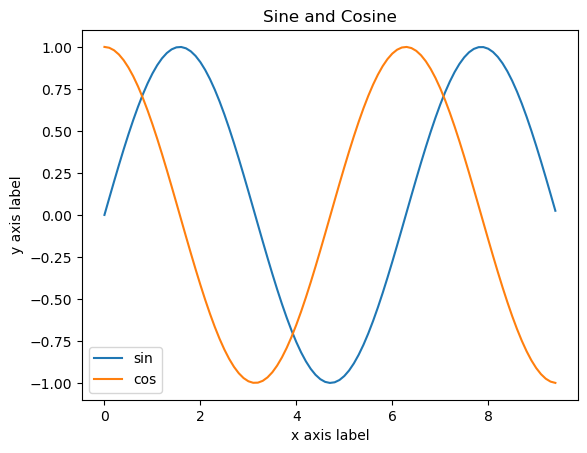

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

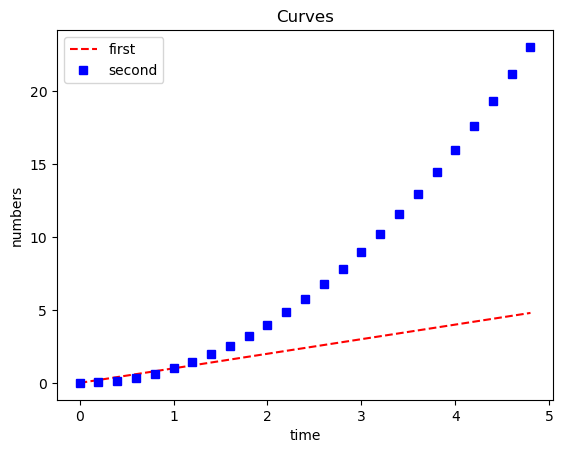

In [87]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 5, 0.2)
plt.plot(t, t, 'r--',label='first')
plt.plot(t, t**2, 'bs', label='second')
plt.legend()
plt.xlabel('time')
plt.ylabel('numbers')
plt.title('Curves')
plt.show()

## <a id="mpl-bar">Bar Plot</a>

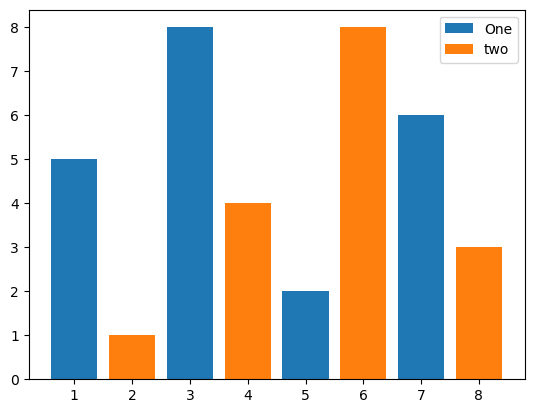

In [48]:
plt.bar([1, 3, 5,7], [5, 8,2,6], label='One')
plt.bar([2,4,6,8], [1,4,8,3], label='two')
plt.legend()
plt.show()

## <a id="mpl-cat">Categorical Data</a>

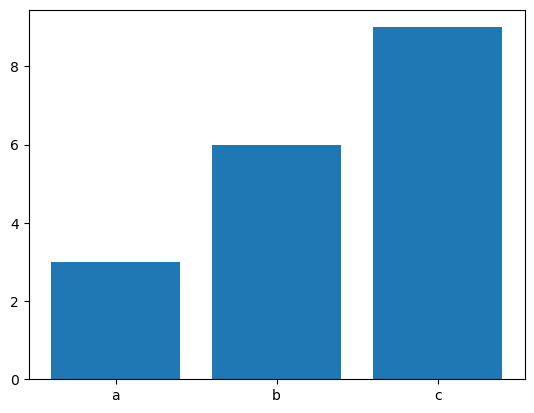

In [49]:
names = ['a', 'b', 'c']
values = [3, 6, 9]
plt.bar(names, values)
plt.show()

## <a id="mpl-scatter">Scatter</a>

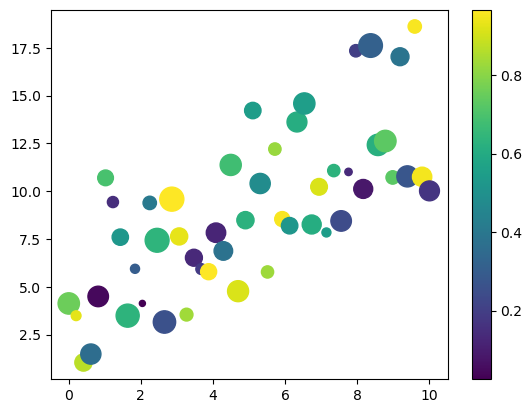

In [50]:
x = np.linspace(0, 10, 50)
e = np.random.rand(50) * 10
y = x + e
color = np.random.rand(50)
area = np.random.rand(50) * 300
plt.scatter(x, y, c = color, s=area)
plt.colorbar()
plt.show()

## <a id="mpl-annotate">Annotate</a>

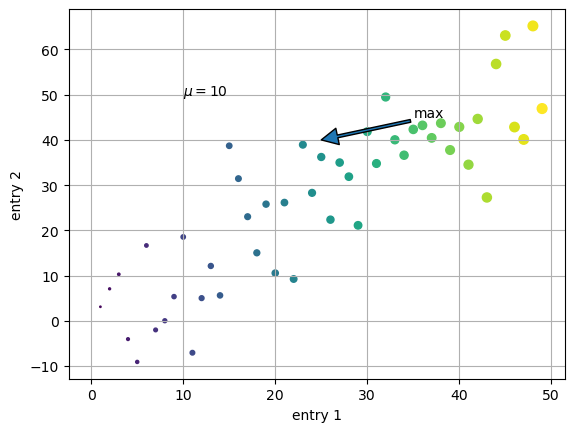

In [51]:
z = np.arange(50)
d = np.arange(50)
m = np.arange(50)
a = np.random.randn(50)
b = z + a * 10
plt.scatter(z, b, c = m, s = d)
plt.xlabel('entry 1')
plt.ylabel('entry 2')
plt.grid()
plt.text(10, 50, '$\mu=10$')
plt.annotate('max', xy=(25, 40), xytext=(35, 45), arrowprops=dict(width=2))
plt.show()

## <a id="mpl-hist">Histogram</a>

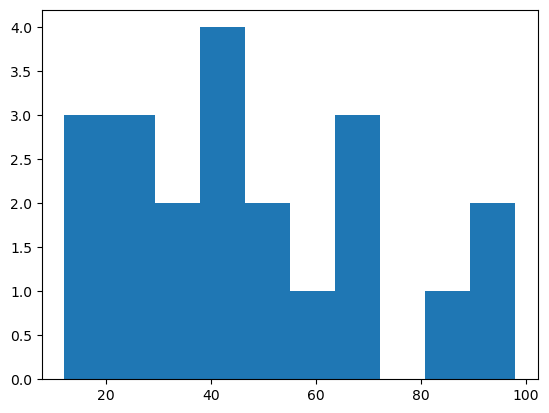

In [52]:
p_ages = [22, 98, 35, 45, 56, 12 , 12 ,45 ,51, 23, 45, 90, 87, 67, 23, 45, 65, 71, 12, 34, 54]
plt.hist(p_ages, bins=10)
plt.show()

## <a id="mpl-subplot">Subplots</a>
You can plot different things in the same figure using the `subplot` function. Here is an example:

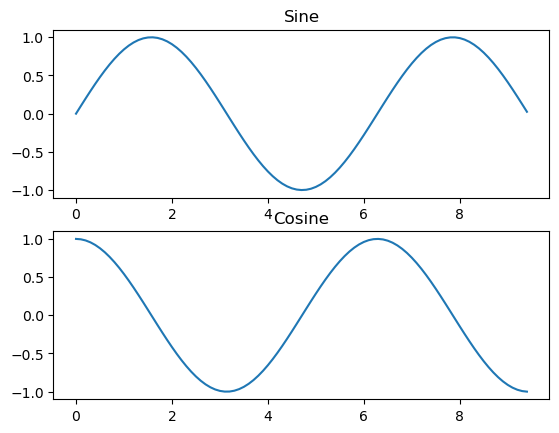

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

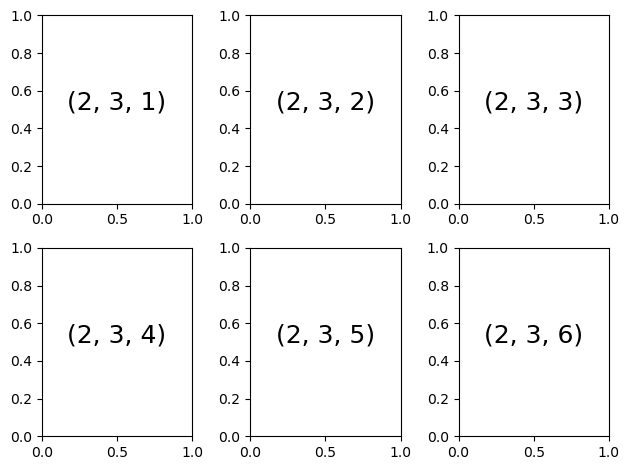

In [54]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')
plt.tight_layout()


You can read much more about the `subplot` function [in the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

## <a id="mpl-images">Images</a>
You can use the `imshow` function to show images. Here is an example:

/tmp/ipykernel_21145/4087805185.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread('sample_image.png')


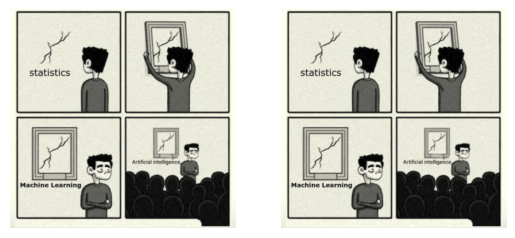

In [55]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

img = imread('sample_image.png')
img_tinted = img

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.axis('off')
plt.show()

# <a id="pypi">Pypi</a>
Find, install and publish Python packages with the Python Package Index

## <a id="pypi-pip">Pip</a>
To install a package from pypi we use a tool called `pip`.

### Install

In [60]:
! pip install package-name

### Upgrade

In [61]:
! pip install --upgrade package-name

### Uninstall

In [62]:
! pip uninstall package-name

### List of Installed Packages

version: major.minor.bug-fixes

In [91]:
! pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
accelerate                    0.33.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwri

In [63]:
! pip install package-name==version
! pip install package-name==2.9.*
! pip install package-name==2.*

## <a id="pypi-env">Virtual Environments</a>
we cannot have two versions of any of these packages side by side. We can only have a single version, to solve this problem we need to create an isolated virtual environment for each application and install these dependencies into that virtual isolated environment

### Create

In [ ]:
! python3 -m venv venv-name

### Activate

In [ ]:
! source env/bin/activate

## <a id="pypi-pipenv">Pipenv</a>
So you have learned about pip and creating virtual environments, as you have noticed, using these tools requires memorizing various commands and arguments. There's a lot to remember. That's where pipenv comes into picture.

### Install

In [ ]:
! pip install pipenv

In [ ]:
! pipenv install package-name

### Activate

In [ ]:
! pipenv shell

### Deactivate

In [ ]:
! exit

**Next step:** You'll explore the NumPy library in your first assignment.

Done!